> #### Resolution of the DNA methylation state of single CpG dyads using in silico strand annealing and WGBS data
Nature protocol | https://www.nature.com/articles/s41596-018-0090-x

<!-- > - Whole-genome bisulfite sequencing (WGBS) has been widely used to quantify cytosine DNA methylation frequency in an expanding array of cell and tissue types. Because of the denaturing conditions used, this method ultimately leads to the measurement of methylation frequencies at single cytosines. 
> - Hence, the methylation frequency of CpG dyads (two complementary CG dinucleotides) can be only indirectly inferred by overlaying the methylation frequency of two cytosines measured independently. 
> - Furthermore, hemi-methylated CpGs (hemiCpGs) have not been previously analyzed in WGBS studies. We recently developed in silico strand annealing (iSA), a bioinformatics method applicable to WGBS data, to resolve the methylation status of CpG dyads into __unmethylated__, __hemi-methylated__, and __methylated__. 
> - HemiCpGs account for 4–20% of the DNA methylome in different cell types, and some can be inherited across cell divisions, suggesting a role as a stable epigenetic mark. Therefore, it is important to resolve hemiCpGs from fully methylated CpGs in WGBS studies. This protocol describes step-by-step commands to accomplish this task, including dividing alignments by strand, pairing alignments between strands, and extracting single-fragment methylation calls. 
> - The versatility of iSA enables its application downstream of other WGBS-related methods such as nasBS-seq (nascent DNA bisulfite sequencing), ChIP-BSseq (ChIP followed by bisulfite sequencing), TAB-seq, oxBS-seq, and fCAB-seq. iSA is also tunable for analyzing the methylation status of cytosines in any sequence context. 
> - We exemplify this flexibility by uncovering the single-fragment non-CpG methylome. 
> - This protocol provides enough details for users with little experience in bioinformatic analysis and takes 2–7 h. -->

> #### Extended-representation bisulfite sequencing of gene regulatory elements in multiplexed samples and single cells
https://www.nature.com/articles/s41587-021-00910-x

Data: [GSE149954](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE149954)
- [HL60 Bisulfite-Seq - 10ng dmso](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4518676)
- [HL60 Bisulfite-Seq - 10ng decitabine](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4518677)

___
<!-- > - Before alignment, primer dimers were filtered using Cutadapt version 2.7 and the following parameters: `--discard -a GCTCTTCCGATCT`. Short read pairs were trimmed using Trim Galore version 0.6.5 and the following parameters: `--paired --illumina --nextseq 20`. 
> - High-quality sequencing reads were then aligned to an in silico bisulfite-converted reference genome (hg38 and mm10) using methylCtools version 1.0.0 (https://github.com/hovestadt/methylCtools, ref. 49) and bwa mem version 0.7.17. 
> - Sorted alignments were further processed to only maintain uniquely mapped read pairs with a mapping score ≥1, that were mapping to an MspI cut site and that had an insert size between 20 bp and 600 bp. Putative PCR duplicates were removed by considering the outer mapping position of both paired-end reads (read 2 being located at the MspI cut site and read 1 being located at variable positions), as well as the random hexamer sequence that was trimmed before alignment and functions as a UMI. For library complexity analysis, alignments were downsampled before this step. 
> - We note that multiple random hexamer priming events during the second-strand synthesis step might lead to additional sequencing reads from the same original fragment that cannot be identified using this approach. DNA methylation calling was performed using methylCtools bcall and the --trimPE parameter. Detailed quality metrics for each library are provided in Supplementary Table 1. DNA methylation values were deposited in the GEO (GSE149954) for all samples reported in this study.


 -->
 
<!--  This is simply called RRBS protocol :) -->

> #### Detection of differentially methylated regions from whole-genome bisulfite sequencing data without replicates
https://pubmed.ncbi.nlm.nih.gov/26184873/
> - https://bioconductor.org/packages/release/bioc/vignettes/DSS/inst/doc/DSS.html
> - Developed by https://www.haowulab.org/

<!-- ___ 
- my old notebook based on `DESeq2` (version v1.20) - https://github.com/goodarzilab/Abe/blob/master/People/Kivanc/notebook.ipynb

- convert `edgeR` to  object https://bioconductor.org/packages/devel/bioc/vignettes/DEFormats/inst/doc/DEFormats.html#dgelist-to-deseqdataset -->



> #### Y disruption, autosomal hypomethylation and poor male lung cancer survival
https://www.nature.com/articles/s41598-021-91907-8
> - Analysis of WGBS-Seq data was performed with GenPipes47. The standard GenPipe for methylation analysis Methyl-Seq is adapted from the Bismark pipeline. Alignment was performed with bismark (0.18.1) and bowtie2 (2.3.1) according to bismark user guide manual with default options. SAM files thus obtained per sample were sorted by chromosomic location with GATK (Genome Analysis Tool Kit) (3.7) and read alignments deemed to be PCR duplicates were removed with Picard (2.9.0). Bismark methylation extractor was used to extract methylation in CpG context. Methylkit R package (1.12.0) was used to obtain median methylation per sample and clustering based on methylation profiles.
> - Calling of Differentially Methylated Regions (DMRs) was performed with Dispersion Shrinkage for Sequencing data with single replicates (DSS-single)48 implemented in the DSS Bioconductor R package (2.34.0) which takes into account spatial correlation, read depth and biological variation between groups. DMRs were called using the criterion absolute methylation differences > 20% and P < 0.001.

> - Coordinates 1 Kb upstream hg19 Ensembl genes were downloaded from UCSC Table Browser to obtain promoter genomic regions. Proximity of DMRs to promoter regions was analysed with Bedtools’ IntersectbED49. Then, enriched TF binding motifs in the genomic regions of promoters were identified by employing the motif enrichment algorithm in the HOMER (4.9.1) tool50. CpG normalization and use of the repeat-masked sequence were the options given for finding enriched motifs in the genomic regions given.

> - In order to avoid any confounding influence of low chromosome Y read depth on the measurement of Y chromosome DNA methylation, the analysis was restricted to the autosomes.

In [1]:
library(methylKit)
library(DSS)
library(edgeR)
library(tidyverse)
library(ggrepel)
library(patchwork)
library(genomation)
library(GenomicFeatures)
library(ORFik)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain 

In [2]:
source('../util.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file '../util.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## methylKit

- https://github.com/al2na/methylKit
- https://bioconductor.org/packages/release/bioc/html/genomation.html
- https://www.slideshare.net/AlexanderGosdschan/eurobioc-2018-metyhlkit-overview

#### DNA methylation

> - DNA methylation in vertebrates typically occurs at CpG dinucleotides, however non-CpG Cs are also methylated in certain tissues such as embryonic stem cells. DNA methylation can act as an epigenetic control mechanism for gene regulation. Methylation can hinder binding of transcription factors and/or methylated bases can be bound by methyl-binding-domain proteins which can recruit chromatin remodeling factors. 
> - In both cases, the transcription of the regulated gene will be effected. In addition, aberrant DNA methylation patterns have been associated with many human malignancies and can be used in a predictive manner. In malignant tissues, DNA is either hypo-methylated or hyper-methylated compared to the normal tissue. The location of hyper- and hypo-methylated sites gives a distinct signature to many diseases. 
> - Traditionally, hypo-methylation is associated with gene transcription (if it is on a regulatory region such as promoters) and hyper-methylation is associated with gene repression.

In [ ]:
filtere_obj <- function(myobj){
    filtered.myobj=filterByCoverage(myobj,lo.count=10,lo.perc=NULL,
                                    hi.count=NULL,hi.perc=99.9)
    return(filtered.myobj)
    }

> ### Reading processed Bismark files 
> Bismark aligner scripts can produce per base methylation files. These files, namely "cytosine report"  and "coverage" files can be read in R using methylKit methRead() function. See Bismark manual for details on the files.


In [ ]:
files = list.files('bismark/',pattern='srt.bam',full.names = TRUE) %>% as.list

In [ ]:
meth = methylKit::processBismarkAln(
    files,
    sample.id=list('DMSO',"Decitabine"),
    assembly="hg38",
    save.folder='methylKit',
    save.context=NULL,
    read.context="CpG",
    nolap=FALSE,mincov=10,minqual=20,phred64=FALSE,
    treatment=c(0,1)
)

In [ ]:
saveRDS(meth, file = "methylKit/meth.rds")

In [ ]:
meth <- readRDS(file = "methylKit/meth.rds")

#### Descriptive statistics on samples

In [ ]:
getMethylationStats(meth[[1]],plot=TRUE,both.strands=FALSE) 
getMethylationStats(meth[[2]],plot=TRUE,both.strands=FALSE) 

#### Filtering samples based on read coverage

In [ ]:
meth1 = filtere_obj(meth)

#### Merging samples

In [ ]:
meth_merged=methylKit::unite(meth1, destrand=FALSE)

In [ ]:
getCorrelation(meth_merged,plot=TRUE)

In [ ]:
tiles = tileMethylCounts(meth,win.size=1000,step.size=1000,cov.bases = 10)

In [ ]:
head(tiles[[1]],3)

#### Finding differentially methylated bases or regions

In [ ]:
plot_Volcano <- function (
    res, meth.diff.cutoff, pvalue.cutoff, title='', labels=NA, x_lim=FALSE,y_lim=NA
) {
    if (x_lim==FALSE){
        x_min = res$meth.diff %>% min
        x_max = res$meth.diff %>% max
    } else {
        x_min = x_lim[1]
        x_max = x_lim[2]
    }
    colors_values = c("grey80", "#FF4500") # https://www.rapidtables.com/web/color/RGB_Color.html

    vol <- res %>% ggplot(aes(x = meth.diff, y = -log10(pvalue))) + 
        geom_point(
            data = res %>% filter(
                abs(meth.diff) >= meth.diff.cutoff, 
                pvalue < pvalue.cutoff), 
            aes(x = meth.diff, y = -log10(pvalue)), 
            size = 3, alpha = 5/10, shape = 21, 
            color = colors_values[2],
            fill = colors_values[2]) + 

        geom_point(
            data = res %>% filter(
                (abs(meth.diff) < meth.diff.cutoff) | 
                (pvalue >= pvalue.cutoff)), 
            aes(x = meth.diff, y = -log10(pvalue)), 
            size = 1, alpha = 5/10, shape = 21, color = colors_values[1], 
            fill = colors_values[1]) + 

        
        geom_rug(
            data = res %>% filter(
                abs(meth.diff) >= meth.diff.cutoff, 
                pvalue < pvalue.cutoff), 
            sides = "b", colour= colors_values[2]) + 

        xlim(c(x_min, x_max)) + 
        ylim(c(0, y_lim)) + 
        # ylim(c(0, -log10(res %>% select(pvalue) %>% min ))) + 
        geom_hline(yintercept = -log10(pvalue.cutoff), linetype = "dashed", alpha = 5/10) + 
        geom_text(aes(
            x_min*0.9,-log10(pvalue.cutoff),
            label = paste("-~log[10]~(",pvalue.cutoff,')',sep=''), 
            vjust = x_min*0.05
        ),parse = TRUE) +

        theme(
            legend.position = "none"
        ) + 
        ggtitle(title) + theme_Publication()

    return(vol)
}

In [ ]:
myDiff=calculateDiffMeth(meth_merged)

In [ ]:
# # get all differentially methylated bases
# myDiffTop=getMethylDiff(myDiff,difference=0,qvalue=0.05)
# # get hypo methylated bases
# myDiffTop.hypo=getMethylDiff(myDiff,difference=2,qvalue=0.01,type="hypo")

### Annotating differential methylation events 
https://www.biostars.org/p/436554/

### Volcano plot

In [ ]:
myDiff[myDiff$pvalue < 0.5,] %>% data.frame -> myDiffTop
myDiffTop %>% plot_Volcano(25,0.01,title='Bisulfite-seq\nDecitabine vs. DMSO')

#### Finding differentially methylated promoters

In [20]:
# Gene annotation
meth_merged_TSS <- nearestTSS(meth_merged$chr, meth_merged$start)

meth_merged_ann = cbind(meth_merged,meth_merged_TSS %>% rename(tss.strand=strand))

In [21]:
meth_prmoters = meth_merged_ann[
    (meth_merged_ann$distance < 1000) & (meth_merged_ann$distance > -1000),
] %>% dplyr::select(chr,start,end,strand,coverage1,numCs1,numTs1,coverage2,numCs2,numTs2,symbol) %>%
    arrange(symbol) %>%
    group_by(symbol) %>%
    dplyr::summarise(
        chr=unique(chr),
        start=min(start),
        end=max(end),
        strand='.',
        coverage1 = sum(coverage1),numCs1 = sum(numCs1),numTs1 = sum(numTs1),
        coverage2 = sum(coverage2),numCs2 = sum(numCs2),numTs2 = sum(numTs2)
    ) %>% 
    as.data.frame()  %>% GRanges

In [19]:
meth_prmoters %>% as.data.frame %>% 
    write.table(file = "meth_prmoters.txt", sep = "\t",row.names = FALSE,quote=FALSE)

In [280]:
meth_prmoters$symbol[grepl('MIR', meth_prmoters$symbol)]

[1] "MIR10396A"  "MIR1181"    "MIR1203"    "MIR12136"   "MIR1292"   
 [6] "MIR1303"    "MIR153-1"   "MIR1539"    "MIR187"     "MIR1914"   
[11] "MIR194-2HG" "MIR219A1"   "MIR3159"    "MIR3178"    "MIR3614"   
[16] "MIR372"     "MIR3928"    "MIR3935"    "MIR3940"    "MIR4269"   
[21] "MIR433"     "MIR4454"    "MIR4462"    "MIR4466"    "MIR4519"   
[26] "MIR4648"    "MIR4741"    "MIR5087"    "MIR518A1"   "MIR5190"   
[31] "MIR519A2"   "MIR519D"    "MIR574"     "MIR636"     "MIR6736"   
[36] "MIR6743"    "MIR6791"    "MIR6792"    "MIR6797"    "MIR6806"   
[41] "MIR940"     "MIRLET7I"

In [14]:
# # get all differentially methylated bases
# myDiffTop=getMethylDiff(myDiff,difference=0,qvalue=0.05)
# # get hypo methylated bases
# myDiffTop.hypo=getMethylDiff(myDiff,difference=2,qvalue=0.01,type="hypo")

In [28]:
myDiff_gr = myDiff %>% GRanges

PromCpG <- findOverlaps(
    myDiff_gr,meth_prmoters
)

myDiff_gr1 <- myDiff_gr[queryHits(PromCpG)] 
myDiff_gr1$symbol <- meth_prmoters[subjectHits(PromCpG)]$symbol

In [56]:
sign(-10)

[1] -1

In [58]:
res_promoters = myDiff_gr1%>% as.data.frame() %>%
    ## data cleaning 
    dplyr::filter(!meth.diff == 0) %>%
    dplyr::filter(!pvalue >= 0.99) %>%
    dplyr::select(symbol,meth.diff,pvalue) %>%
    ## aggregate to unique genes 
    arrange(symbol) %>%
    group_by(symbol) %>%
    dplyr::summarise(
        meth.diff=meth.diff[which.max(abs(meth.diff))],
        pvalue=min(pvalue)
    ) %>% 
    as.data.frame()

In [59]:
res_promoters %>% as.data.frame %>% 
    write.table(file = "meth_prmoters_diff.txt", sep = "\t",row.names = FALSE,quote=FALSE)

In [69]:
res_promoters$symbol %>% unique %>% length == res_promoters$symbol %>% length

[1] TRUE

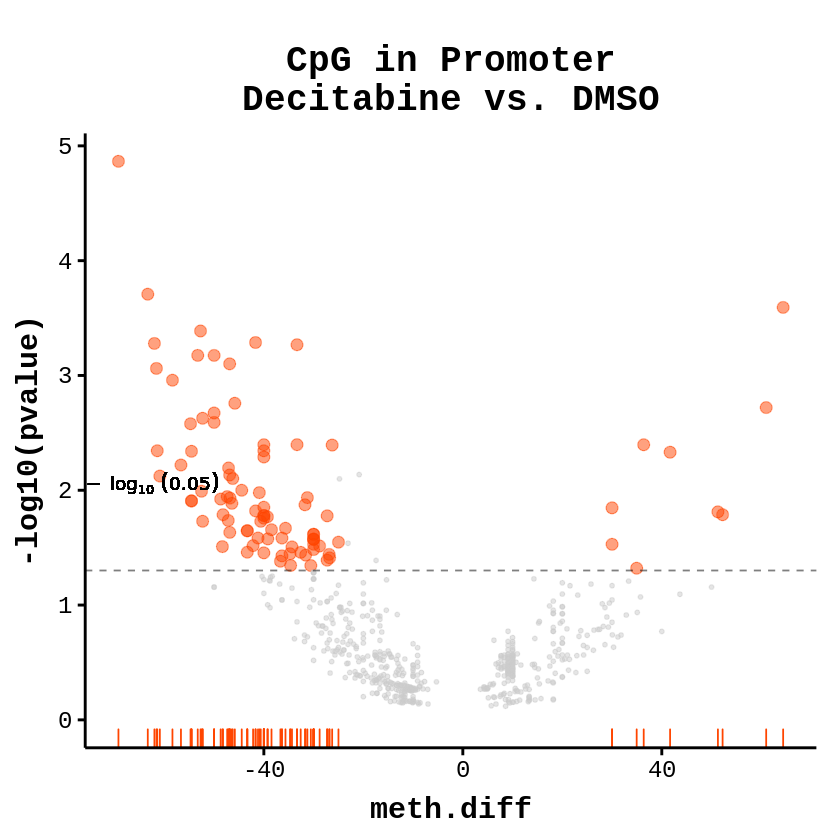

In [70]:
# labels = res_promoters[(abs(res_promoters$meth.diff) > 40) & (res_promoters$pvalue < 0.001),] %>% rownames

res_promoters %>% plot_Volcano(25,0.05,title='CpG in Promoter\nDecitabine vs. DMSO') 

#+ 
        # geom_point(
        #     data = res_promoters[labels,],
        #     aes(x = meth.diff, y = -log10(pvalue)), 
        #     shape = 21, size = 3, color = "grey40", fill = "red3") + 
        # geom_label_repel(
        #     data = res_promoters[labels,],
        #     # data = res_promoters %>% filter(symbol %in% labels), 
        #     aes(label = symbol), box.padding = 1, max.overlaps = Inf)

#### ...

In [125]:
# Gene annotation
myDiffTop_TSS <- nearestTSS(myDiffTop$chr, myDiffTop$start)

In [126]:
res = cbind(myDiffTop %>% rename(meth.strand=strand),myDiffTop_TSS)

In [127]:
res2 = res[(res$distance < 1000) & (res$distance > -1000),] %>% 
    arrange(symbol,pvalue, desc(abs(meth.diff))) %>% distinct(symbol,.keep_all = TRUE)

#### Prepare genome annotations 
https://support.bioconductor.org/p/126514/

In [ ]:
# gtf = gffToGRanges(GTF)

In [122]:
BED12 = '~/genomes/hg38/gencode.v34/gencode.v34.annotation.bed'
GTF = '~/genomes/hg38/gencode.v34/gencode.v34.annotation.gtf'
gtf <- rtracklayer::import(GTF)
gene2name <- gtf[gtf$type == "gene"] %>% data.frame %>% 
    column_to_rownames('gene_id') %>% 
    dplyr::select('gene_name')

In [123]:
txdb  = GenomicFeatures::makeTxDbFromGFF(GTF,organism='Homo sapiens')
# tx2gene objects 
k <- keys(txdb, keytype = "TXNAME")
tx2gene <- AnnotationDbi::select(txdb, k, "GENEID", "TXNAME")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”
OK

'select()' returned 1:1 mapping between keys and columns



In [119]:
# tx2gene <- tx2gene %>% column_to_rownames('TXNAME')

In [120]:
# export.bed12(GRangesList(gtf), BED12)

In [46]:
# len = 1000
# promoters.data <- promoters(txdb, upstream=len, downstream=len)
# promoters.data$gene_name = gene2name[tx2gene[promoters.data$tx_name,],]

In [128]:
gtf2 = gtf[gtf$gene_name %in% res2$symbol]
# an end that is greater or equal to its start minus one
gtf2 = gtf2[end(gtf2) > (start(gtf2))]

In [134]:
gtf2$type %>% unique

[1] gene        transcript  exon        CDS         start_codon stop_codon 
[7] UTR        
8 Levels: gene transcript exon CDS start_codon stop_codon ... Selenocysteine

In [130]:
export.bed12(GRangesList(gtf2), 'methylKit/gene_annotation.bed')

#### Annotating differentially methylated bases or regions

In [131]:
gene.obj = readTranscriptFeatures('methylKit/gene_annotation.bed')

Reading the table...

Calculating intron coordinates...



ERROR: Error in .width_as_unnamed_integer(width, msg = "an end that is greater or equal to its start minus one"): each range must have an end that is greater or equal to its start minus
  one


In [ ]:
annotateWithGeneParts(as(myDiffTop,"GRanges"),gene.obj)

#### Regional analysis


> We can also summarize methylation information over a set of defined regions such as promoters or CpG islands. The function below summarizes the methylation information over a given set of promoter regions and outputs a methylRaw or methylRawList object depending on the input. We are using the output of genomation functions used above to provide the locations of promoters. For regional summary functions, we need to provide regions of interest as GRanges object.


In [ ]:
promoters=regionCounts(myobj,gene.obj$promoters)

head(promoters[[1]])


#### Convenience functions for annotation objects


In [ ]:
diffAnn=annotateWithGeneParts(as(myDiff25p,"GRanges"),gene.obj)

# target.row is the row number in myDiff25p
head(getAssociationWithTSS(diffAnn))


In [ ]:
getTargetAnnotationStats(diffAnn,percentage=TRUE,precedence=TRUE)


In [ ]:
plotTargetAnnotation(diffAnn,precedence=TRUE,
    main="differential methylation annotation")


In [ ]:
plotTargetAnnotation(diffCpGann,col=c("green","gray","white"),
       main="differential methylation annotation")


In [ ]:
getFeatsWithTargetsStats(diffAnn,percentage=TRUE)

In [ ]:
sm = ScoreMatrix(target = cage, windows = promoters)

heatMatrix(sm, xcoords = c(-1000, 1000))
plotMeta(sm, xcoords = c(-1000, 1000))


# 

> ### Overview
> - To detect differential methylation, statistical tests are conducted at each CpG site, and then the __differential methylation loci (DML)__ or __differential methylation regions (DMR)__ are called based on user specified threshold. 
> - An advantage of DSS is that the test can be performed even when there is __no biological replicates__. That’s because by smoothing, the neighboring CpG sites can be viewed as pseudo-replicates, and the dispersion can still be estimated with reasonable precision.
> #### Single replicate
> When there is no biological replicate in one or both treatment groups, users can either 
> - (1) specify equal.disp=TRUE, which assumes both groups have the same dispersion, then the data from two groups are combined and used as replicates to estimate dispersion; 
> - (2) specify smoothing=TRUE, which uses the smoothed means (methylation levels) to estimate dispersions via a shrinkage estimator. This smoothing procedure uses data from neighboring CpG sites as "pseudo-replicate" for estimating biological variance.

In [7]:
dmso_file = 'bismark/SRR11711272_1_val_1_bismark_bt2_pe.bismark.cov.gz'
decitabine_file = 'bismark/SRR11711273_1_val_1_bismark_bt2_pe.bismark.cov.gz'

In [8]:
bisObj = read.bismark(
    c(decitabine_file,dmso_file),
    colData=data.frame(row.names=c("Decitabine",'DMSO'))
)

> ### Step 2.
> #### Perform statistical test for DML by calling DMLtest function
> - In RRBS, CpG sites are likely to be clustered locally within small genomic regions, so smoothing can potentially help the methylation estimation.

In [9]:
register(MulticoreParam(1))

In [10]:
# perform statistical test for DML with smoothing
dmlTest = DMLtest(
    bisObj, 
    group1=c('Decitabine'), group2=c("DMSO"),
    smoothing=TRUE
    # BPPARAM=MulticoreParam(1)
)

Smoothing ...
Estimating dispersion for each CpG site, this will take a while ...
  |======================================================================| 100%
  |======================================================================| 100%
Computing test statistics ...


> ### Step 3.
> #### With the test results, one can call DML by using callDML function. 
> - The results DMLs are sorted by the significance.

In [11]:
dmls = callDML(dmlTest, p.threshold=0.01)
head(dmls)

,chr,pos,mu1,mu2,diff,diff.se,stat,phi1,phi2,pval,fdr,postprob.overThreshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
61,chr1,183386,0.07339117,0.8431514,-0.7697603,0.07381784,-10.42784,0.04978707,0.04978707,1.850563e-25,1.056235e-21,1
157,chr1,775712,0.28929290,0.9384937,-0.6492008,0.06480225,-10.01818,0.04978707,0.04978707,1.268137e-23,4.767610e-20,1
158,chr1,775714,0.28929290,0.9384937,-0.6492008,0.06480225,-10.01818,0.04978707,0.04978707,1.268137e-23,4.767610e-20,1
159,chr1,775716,0.28929290,0.9384937,-0.6492008,0.06480225,-10.01818,0.04978707,0.04978707,1.268137e-23,4.767610e-20,1
14596,chr1,1303016,0.44274848,0.9298892,-0.4871407,0.04574473,-10.64911,0.04978707,0.05022426,1.760372e-26,1.217693e-22,1
14598,chr1,1303037,0.44274848,0.9298892,-0.4871407,0.04574473,-10.64911,0.04978707,0.05022426,1.760372e-26,1.217693e-22,1


In [12]:
dmls2 = callDML(dmlTest, delta=0.1, p.threshold=0.001)
head(dmls2)

,chr,pos,mu1,mu2,diff,diff.se,stat,phi1,phi2,pval,fdr,postprob.overThreshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
61,chr1,183386,0.07339117,0.8431514,-0.7697603,0.07381784,-10.42784,0.04978707,0.04978707,1.850563e-25,1.056235e-21,1
157,chr1,775712,0.28929290,0.9384937,-0.6492008,0.06480225,-10.01818,0.04978707,0.04978707,1.268137e-23,4.767610e-20,1
158,chr1,775714,0.28929290,0.9384937,-0.6492008,0.06480225,-10.01818,0.04978707,0.04978707,1.268137e-23,4.767610e-20,1
159,chr1,775716,0.28929290,0.9384937,-0.6492008,0.06480225,-10.01818,0.04978707,0.04978707,1.268137e-23,4.767610e-20,1
14596,chr1,1303016,0.44274848,0.9298892,-0.4871407,0.04574473,-10.64911,0.04978707,0.05022426,1.760372e-26,1.217693e-22,1
14598,chr1,1303037,0.44274848,0.9298892,-0.4871407,0.04574473,-10.64911,0.04978707,0.05022426,1.760372e-26,1.217693e-22,1


In [13]:
# Gene annotation
dmls_TSS <- nearestTSS(dmls$chr, dmls$pos)

In [41]:
res = cbind(dmls,dmls_TSS)

In [80]:
res2 = res[(res$distance < -500) & (res$distance > -1000),] %>% 
    arrange(symbol,pval, desc(abs(stat)))
# %>% 
#     distinct(symbol,.keep_all = TRUE)

In [43]:
p1 = ggplot(res2, aes(x=stat)) + geom_histogram(bins=100) + theme_Publication()
p2 = ggplot(res2, aes(x=pval)) + geom_histogram(bins=100) + theme_Publication()
p3 = ggplot(res2, aes(x=fdr)) + geom_histogram(bins=100) + theme_Publication()

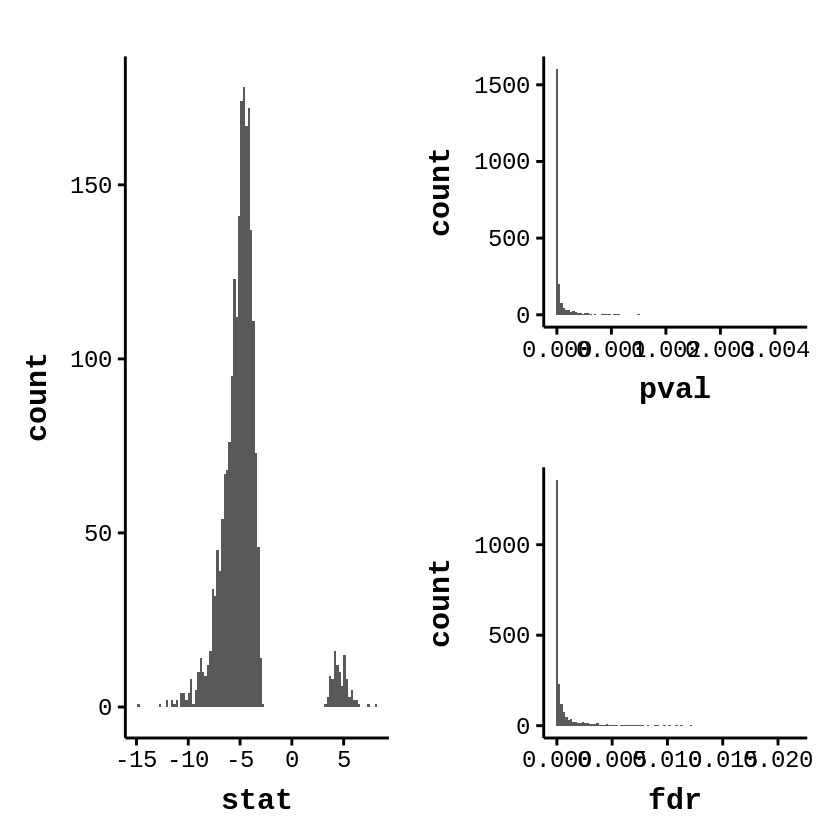

In [44]:
p1+p2/p3

In [82]:
res2 %>% dim

[1] 15769    18

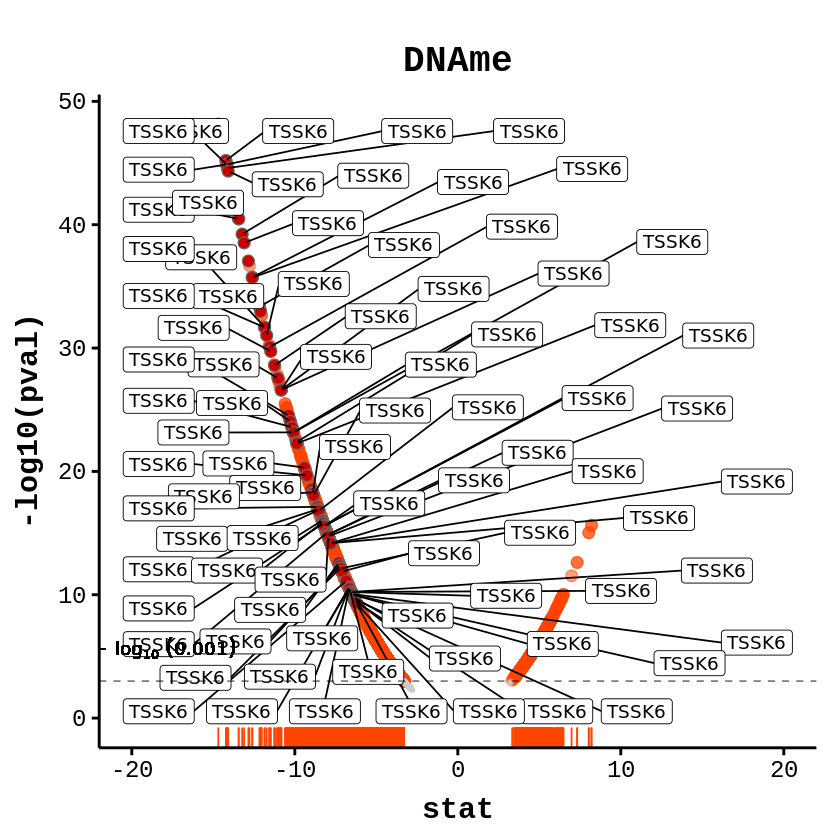

In [83]:
res2 %>% 
    plot_Volcano(
        0,0.001,title='DNAme',x_min=-20,x_max=20,
        labels=arrange(
            res2[(
                res2$stat< -14
            )|(
                res2$stat>8 & res2$pval<10^-10),],pval
        )$symbol[1:2]
    )

In [22]:
gr = granges(bisObj) 
cov= getCoverage(bisObj)
names(gr) = 1:dim(cov)[1]
row.names(cov) = names(gr)

In [47]:
# res2

In [94]:
res2 %>% 
    mutate(pos2=pos) %>% 
    rename(start=pos,end=pos2) %>% 
    dplyr::select(chr,start,end,strand,symbol,stat,pval) %>% 
    head 


,chr,start,end,strand,symbol,stat,pval
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,chr19,58352984,58352984,-,A1BG,-5.029538,4.916643e-07
2,chr19,58352988,58352988,-,A1BG,-5.029538,4.916643e-07
3,chr12,125066326,125066326,+,AACS,-7.604857,2.852192e-14
4,chr12,125066321,125066321,+,AACS,-6.550890,5.719519e-11
5,chr12,125066350,125066350,+,AACS,-5.702320,1.181878e-08
6,chr12,125066361,125066361,+,AACS,-5.702320,1.181878e-08


In [97]:
res_gr = makeGRangesFromDataFrame(
    res2 %>% 
        mutate(pos2=pos) %>% 
        dplyr::select(chr,pos,pos2,strand,symbol,stat,pval) %>% 
        rename(start=pos,end=pos2),
    keep.extra.columns=TRUE
)
res_gr

GRanges object with 15769 ranges and 3 metadata columns:
          seqnames    ranges strand |      symbol      stat        pval
             <Rle> <IRanges>  <Rle> | <character> <numeric>   <numeric>
      [1]    chr19  58352984      - |        A1BG  -5.02954 4.91664e-07
      [2]    chr19  58352988      - |        A1BG  -5.02954 4.91664e-07
      [3]    chr12 125066326      + |        AACS  -7.60486 2.85219e-14
      [4]    chr12 125066321      + |        AACS  -6.55089 5.71952e-11
      [5]    chr12 125066350      + |        AACS  -5.70232 1.18188e-08
      ...      ...       ...    ... .         ...       ...         ...
  [15765]    chr19  56197370      - |     ZSCAN5B  -7.70961 1.26206e-14
  [15766]    chr19  56197305      - |     ZSCAN5B  -7.47509 7.71518e-14
  [15767]    chr19  56197379      - |     ZSCAN5B  -6.75216 1.45656e-11
  [15768]    chr19  56197383      - |     ZSCAN5B  -6.75088 1.46948e-11
  [15769]    chr19  56197387      - |     ZSCAN5B  -6.75088 1.46948e-11
  -----

In [98]:
cov[
    subsetByOverlaps(
        gr, 
        res_gr[res_gr$symbol == "TSSK6"]
    ) %>% names, 
] %>% colSums

Decitabine       DMSO 
        45        314

In [99]:
cov[
    subsetByOverlaps(
        gr, 
        res_gr[res_gr$symbol == "RNLS"]
    ) %>% names, 
] %>% colSums

Decitabine       DMSO 
         0          4

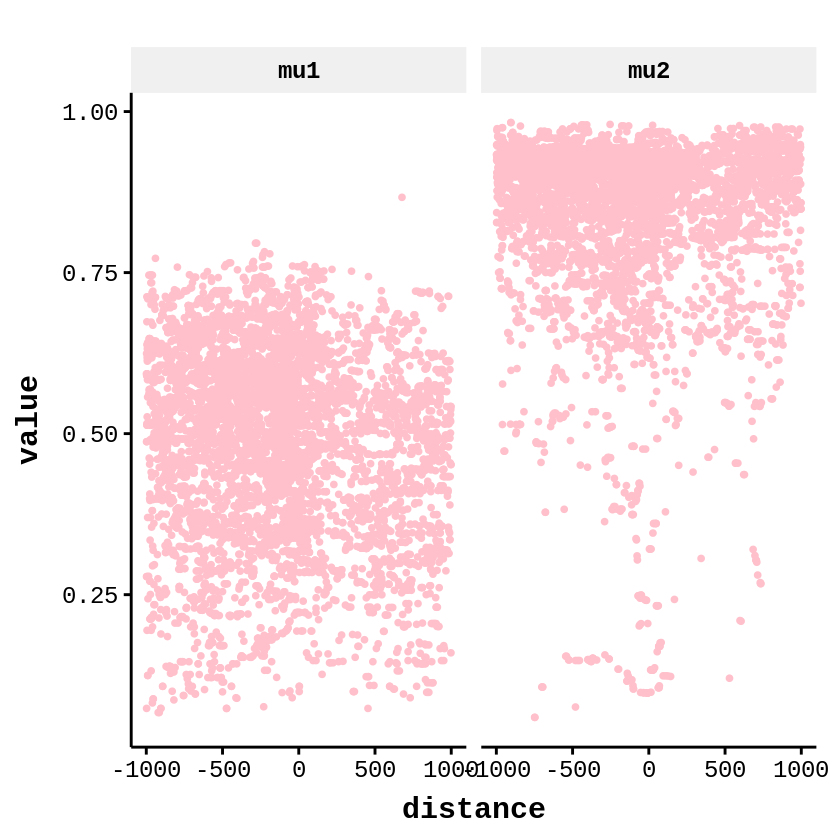

In [146]:
res[(abs(res$distance) < 1000) & (res$pval < 10^-10),] %>% 
    # colnames
    dplyr::select(distance,mu1,mu2) %>% 
    tidyr::gather("id", "value", 2:3) %>% 
    ggplot(., aes(distance, value))+
    geom_point(color='pink')+
    # geom_smooth(method = "lm", se=FALSE, color="blue")+
    facet_wrap(~id) + 
    theme_Publication()

# ?!?!?!

> ### Step 4. 
> #### DMR detection is also Based on the DML test results, by calling callDMR function. 
> - Regions with many statistically significant CpG sites are identified as DMRs. Some restrictions are provided by users, including the minimum length, minimum number of CpG sites, percentage of CpG site being significant in the region, etc. There are some post hoc procedures to merge nearby DMRs into longer ones.


In [ ]:
dmrs = callDMR(dmlTest, p.threshold=0.01)
head(dmrs)

In [ ]:
dmrs2 = callDMR(dmlTest, delta=0.1, p.threshold=0.05)
head(dmrs2)

> The DMRs can be visualized using `showOneDMR` function, This function provides more information than the plotRegion function in bsseq. It plots the methylation percentages as well as the coverage depths at each CpG sites, instead of just the smoothed curve. So the coverage depth information will be available in the figure.

In [ ]:
showOneDMR(dmrs2[1,], BSobj)

___
> #### Differential methylation analysis of reduced representation bisulfite sequencing experiments using edgeR
> - https://f1000research.com/articles/6-2055/v2 It's cool but not working for 1 replicate! 

In [ ]:
# %load_ext rpy2.ipython

In [3]:
# # %%R 
# library(edgeR)
# library(DESeq2,quietly = TRUE)
# library(tidyverse, quietly = TRUE)
# library(ggplot2, quietly = TRUE)
# library(dplyr)
# library(DEFormats)

# # library(NOISeq, quietly = TRUE)
# # library(EnhancedVolcano, quietly = TRUE)
# # library(refGenome)
# # library(pheatmap)

## Reading in the data


> We now read in the Bismark coverage files for all the samples. The edgeR function `readBismark2DGE` reads all the files and collates the counts for all the sample into one data object:


> The columns in the coverage file represent: 
> - V1: chromosome number; 
> - V2: start position of the CpG site; 
> - V3: end position of the CpG site; 
> - V4: methylation proportion; 
> - V5: number of methylated Cs; 
> - V6: number of unmethylated Cs.

In [ ]:
yall <- edgeR::readBismark2DGE(
    c(dmso_file,decitabine_file), 
    sample.names=c('DMSO',"Decitabine")
)

In [ ]:
dim(yall)

In [ ]:
yall$samples$group <- factor(c(rep('DMSO',2),rep("Decitabine",2)))
yall$samples$Methylation <- gl(2,1,4, labels=c("Me","Un"))
yall$samples

In [ ]:
# Sort into genomic order
ChrNames <- paste0("chr",c(1:22,"X","Y","M"))

yall$genes$Chr <- factor(yall$genes$Chr, levels=ChrNames)
o <- order(yall$genes$Chr, yall$genes$Locus)
yall <- yall[o,]

In [ ]:
# Gene annotation
TSS <- nearestTSS(yall$genes$Chr, yall$genes$Locus)

In [ ]:
yall$genes$EntrezID <- TSS$gene_id
yall$genes$Symbol <- TSS$symbol
yall$genes$Strand <- TSS$strand
yall$genes$Distance <- TSS$distance
yall$genes$Width <- TSS$width
head(yall$genes)

### Differential methylation analysis at CpG loci


In [ ]:
# Filtering to remove low counts
Coverage <- yall$counts[,yall$samples$Methylation=="Me"] + yall$counts[,yall$samples$Methylation=="Un"]
keep <- rowSums(Coverage >= 8) == 2
table(keep)

In [ ]:
y <- yall[keep,, keep.lib.sizes=FALSE]
dim(y)

> A key difference between BS-seq and other sequencing data is that the pair of libraries holding the methylated and unmethylated reads for a particular sample are treated as a unit. To ensure that the methylated and unmethylated reads for the same sample are treated on the same scale, we need to set the library sizes to be equal for each pair of libraries. We set the library sizes for each sample to be the average of the total read counts for the methylated and unmethylated libraries:


In [ ]:
yall$samples

In [ ]:
# Normalization
TotalLibSize <- yall$samples$lib.size[yall$samples$Methylation=="Me"] + yall$samples$lib.size[yall$samples$Methylation=="Un"]
y$samples$lib.size <- rep(TotalLibSize, each=2)
y$samples

### Exploring differences between samples
> In microarray methylation studies, a common measure of methylation level is the M-value, which is defined as $M = log2 {(Me + α)/(Un + α)}$ where Me and Un are the methylated and unmethylated intensities and α is some suitable offset to avoid taking logarithms of zero39. The M-value can be interpreted as the base2 logit transformation of the proportion of methylated signal at each locus.

> We compute the corresponding methylation summary from the methylated and unmethylated counts.

In [ ]:
Me <- y$counts[, yall$samples$Methylation=="Me"]
Un <- y$counts[, yall$samples$Methylation=="Un"]
M <- log2(Me + 2) - log2(Un + 2)
colnames(M) <- levels(y$sample$group)

___

In [49]:
# # plotMDS(M)

# # # Design matrix
# # designSL <- model.matrix(~0+group, data=y$samples[Methylation=='Me',])
# # colnames(designSL) <- levels(y$sample$group)
# # rownames(designSL) <- levels(y$sample$group)

# # # Dispersion estimation
# # y <- estimateDisp(y, design, trend="none")
# # y$common.dispersion
# # y$prior.df

# # Testing for differentially methylated CpG loci
# fit <- glmFit(y, design)

This is not working!
> Unfortunately the underlying methods require at least two biological replicates to work (and many more is recommended). So there is no way to run the pipeline with juts one replicate per condition.



In [52]:
# %%R 
# dds = as.DESeqDataSet(yall)

# dds$group = relevel(dds$group,ref='DMSO')
# dds$Methylation = relevel(dds$Methylation,ref='Un')

# design(dds) = ~group+Methylation+group:Methylation

# dds1 <- DESeq(dds)

In [105]:
# Differential methylation by chromosome
> ChrIndices <- list()
> for (a in ChrNames) ChrIndices[[a]] <- which(y$genes$Chr==a)

> fry(y, index=ChrIndices, design=design, contrast=contr)


ERROR: Error in parse(text = x, srcfile = src): <text>:2:1: unexpected '>'
1: # Differential methylation by chromosome
2: >
   ^


In [ ]:
# Global methylation patterns around TSS
> i <- abs(fit$genes$Distance) < 20000
> lo <- lowess(fit$genes$Distance[i], fit$coefficient[i,"P6"], f=0.3)
> plot(lo, type="l", xlab="Distance to TSS", ylab="Logit Methylation Level",
+       main="P6 (Luminal)")
> abline(h=0, lty=2)
> abline(v=0, lty=2)

> i <- abs(lrt$genes$Distance) < 80000
> lo <- lowess(lrt$genes$Distance[i], lrt$table$logFC[i], f=0.3)
> plot(lo, type="l", xlab="Distance to TSS", ylab="Change in Methylation",
+       main="Luminal vs Basal")
> abline(v=0, lty=2, col="grey")



### Differential methylation in gene promoters


In [ ]:
# Pre-defined gene promoters
> InPromoter <- yall$genes$Distance >= -1000 & yall$genes$Distance <= 2000
> yIP <- yall[InPromoter,,keep.lib.sizes=FALSE]

# Summarizing counts in promoter regions
> ypr <- rowsum(yIP, yIP$genes$EntrezID, reorder=FALSE)
> ypr$genes$EntrezID <- NULL

# Filtering to remove low counts
> Coveragepr <- ypr$counts[,Methylation=="Me"] +
+               ypr$counts[,Methylation=="Un"]

> keeppr <- rowSums(Coverageprm >= 10) == 6
> table(keeppr)

> ypr <- ypr[keeppr,,keep.lib.sizes=FALSE]
> TotalLibSizepr <- 0.5*ypr$samples$lib.size[Methylation=="Me"] +
+                     0.5*ypr$samples$lib.size[Methylation=="Un"]
> ypr$samples$lib.size <- rep(TotalLibSizepr, each=2)
> ypr$samples


In [ ]:
# Exploring differences between samples
> Me <- ypr$counts[, Methylation=="Me"]
> Un <- ypr$counts[, Methylation=="Un"]
> M2 <- log2(Me + 2) - log2(Un + 2)
> colnames(M2) <- Sample
> plotMDS(M2)
# Dispersion estimation
> ypr <- estimateDisp(ypr, design, trend="none")
> ypr$common.dispersion

> ypr$prior.df

> plotBCV(ypr)


In [ ]:
# Testing for differential methylation in gene promoters
> fitpr <- glmFit(ypr, design)
> lrtpr <- glmLRT(fitpr, contrast=contr)
> topTags(lrtpr, n=20)
> summary(decideTests(lrtpr))
> topME <- topTags(lrtpr, n=Inf, p=0.05)$table
> dim(topME)
> plotMD(lrtpr)


### Correlate with RNA-seq profiles

In [ ]:
> load("rna.RData")
> dim(y_rna)
> haveME <- row.names(y_rna) %in% row.names(ypr)
> y_rna <- y_rna[haveME,]
> dim(y_rna)
> fitrna <- glmFit(y_rna)
> Contrastrna <- makeContrasts(L.virgin-B.virgin, levels=y_rna$design)
> lrtrna <- glmLRT(fitrna, contrast=Contrastrna)
# Correlate methylation and expression
> topME$logFC.RNA <- lrtrna$table[row.names(topME),"logFC"]
> topME[1:30,c("Symbol","logFC","logFC.RNA")]

> plot(topME$logFC, topME$logFC.RNA, main="Lumina vs Basal",
+      xlab="Methylation logFC", ylab="Expression logFC",
+      pch=16, cex=0.8, col="gray30")
> abline(h=0, v=0, col="gray10", lty=2, lwd=2)


> Figure 8. Scatter plot of the log-fold-changes of methylation levels in gene promoters (x-axis) vs the log fold-changes of gene expression (y-axis).


In [ ]:
> RNAvsME <- lm(topME$logFC.RNA ~ 0 + topME$logFC)
> coef(summary(RNAvsME))

            Estimate Std. Error t value Pr(>|t|)
topME$logFC   -0.738     0.0472   -15.7 6.17e-48

> abline(RNAvsME, col="red", lwd=2) 


In [ ]:
# Gene set testing
> ME <- data.frame(ID=row.names(topME), logFC=topME$logFC, stringsAsFactors=FALSE)
> inRNA <- ME$ID %in% row.names(y_rna)
> ME <- ME[inRNA,]
> fry(y_rna, index=ME, contrast=Contrastrna)

> logFC.ME <- rep_len(0,nrow(y_rna))
> names(logFC.ME) <- row.names(y_rna)
> logFC.ME[ME$ID] <- ME$logFC
> barcodeplot(lrtrna$table$logFC, gene.weights=logFC.ME,
+               labels=c("Basal","Luminal"), main="Luminal vs Basal",
+               xlab="Expression logFC", weights.label="Me logFC")
> legend("topright", col=c("red","blue"), lty=1, lwd=2,
+         legend=c("Hypermethylated in Luminal", "Hypomethylated in Luminal"))


___
__Discussion__
> This article has presented a complete start to finish analysis of an RRBS dataset from our own practice. The analysis demonstrates how BS-seq data can be analyzed using software designed for RNA-seq, thus benefiting from a large reservoir of highly-developed RNA-seq methodology. At first sight, BS-seq data is fundamentally different to RNA-seq because of the need to focus on the proportion of methylated reads at each locus rather than on the absolute number of reads at each locus. The link is achieved by conducting the statistical inference conditional on the read coverage at each locus, and this in turn is achieved by including sample-specific locus effects in the linear model.

> We have concentrated on analysing methylation changes for pre-defined genomic regions. At the highest resolution, conducted differential methylation tests for each distinct CpG site. Our main analysis was gene-level, whereby we aggregated counts over a putative promoter region around the TSS for each gene. This gives a “big picture” analysis and facilities a correlation of DM results with differential expression results from RNA-seq for the same cell populations. We also illustrated the use of gene set tests to examine whether there were overall methylation changes at the whole chromosome level.

> The analysis presented here was designed for reduced representation BS-seq and was tuned to our own research interests. While the same analysis approach could be fruitfully applied to WGBS data, researchers with WGBS data may also want to discover DMRs de novo without the use of gene annotation or pre-specified genomic regions, something we haven’t explored in this article. The edgeR approach presented here could in principle be extended to discover DMRs in a de novo fashion using similar methods to those developed for ChIP-seq data41–43.

In [ ]:
> sessionInfo()

# 

In [ ]:
!date